In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('C:/repos/MIRP_benchmarking/LP_files_MILP_vs_MIQP_Benchmark/results.txt', 'rb') as fp:
    results = pickle.load(fp)
del results[20]

result_keys = list(results.keys())
result_keys.sort()
results = {i: results[i] for i in result_keys}

In [3]:
def setup_broken_axis(value_limits, ticks=None):
    fig, axes = plt.subplots(2, 2, width_ratios=(0.2, 1), height_ratios=(1, 0.2))
    fig.subplots_adjust(hspace=0.05, wspace=0.04)  # adjust space between axes

    d = 1  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    
    
    for i in range(2):
        axes[0, i].spines.bottom.set_visible(False)
        axes[1, i].spines.top.set_visible(False)
        axes[0, i].set_xticks([])

        axes[i, 0].spines.right.set_visible(False)
        axes[i, 1].spines.left.set_visible(False)
        axes[i, 1].set_yticks([])
        
        for j in range(2):
            axes[i, j].set_ylim(*value_limits[1-i])
            axes[i, j].set_xlim(*value_limits[j])
            
            axes[i, j].plot(
                [value_limits[j][0], value_limits[j][1]], 
                [value_limits[1-i][i], value_limits[1-i][i]], 
                'k:'
            )
            axes[i, j].plot(
                [value_limits[j][1-j], value_limits[j][1-j]], 
                [value_limits[1-i][0], value_limits[1-i][1]], 
                'k:'
            )
            axes[i, j].plot(value_limits[j], np.roll(value_limits[1-i], j-i), **kwargs)  

    axes[1, 0].set_yticks([np.average(value_limits[0])])
    axes[1, 0].set_xticks([np.average(value_limits[0])])
    axes[1, 0].set_yticklabels(['None'])
    axes[1, 0].set_xticklabels(['None']) 
    
    axes[0, 0].set_ylabel('Maximal feasible Profit MIQP')
    axes[1, 1].set_xlabel('Maximal feasible Profit MILP')
    
    if ticks:
        axes[0, 0].set_yticks(ticks)
        axes[1, 1].set_xticks(ticks)
    
    return fig, axes

In [10]:
# def plot_data(data, ticks=None):
#     points = np.array([value for value in data.values()])

#     aux = lambda x, z: np.round(x + z * (100 + 0.05 * np.abs(x)), decimals=-2)
#     value_limits = np.array([np.min(points[points > -1e10]), np.max(points)])
#     value_limits = aux(value_limits, np.array([-1, 1]))
#     value_limits = [[-1e10, -3e10], value_limits]

#     points[points < -1e10] = -2e10

#     fig, axes = setup_broken_axis(value_limits = value_limits, ticks=ticks)

#     axes[0, 1].plot(value_limits[1], value_limits[1], 'k', linestyle='-.', lw=0.5, zorder=-1)
#     for axes_ in axes:
#         for ax in axes_:
#             ax.scatter(points[:, 0], points[:, 1], marker='x', zorder=1)

#     return fig, axes

In [11]:
# fig, axes = plot_data(results[5], ticks=[0, 1000, 2000, 3000, 4000])
# plt.savefig('figure_MILP_vs_MIQP_5s')

In [6]:
def plot_data(data, ticks=None):
    points = np.array([[value for value in sub_data.values()] for sub_data in data.values()])

    aux = lambda x, z: np.round(x + z * (100 + 0.05 * np.abs(x)), decimals=-2)
    value_limits = np.array([np.min(points[points > -1e10]), np.max(points)])
    value_limits = aux(value_limits, np.array([-1, 1]))
    value_limits = [[-1e10, -3e10], value_limits]

    fig, axes = setup_broken_axis(value_limits = value_limits, ticks=ticks)

    axes[0, 1].plot(value_limits[1], value_limits[1], 'k', linestyle='-.', lw=0.5, zorder=-1)
    
    colors = {5: 'b', 10: 'g', 19: 'r'}
    markers = {5: '.', 10: '+', 19: 'x'}
    for calc_time, sub_data in data.items():
        points = np.array([value for value in sub_data.values()])
        points[points < -1e10] = -2e10
        for axes_ in axes:
            for ax in axes_:
                ax.scatter(
                    points[:, 0], 
                    points[:, 1], 
                    marker=markers[calc_time], 
                    c=colors[calc_time],
                    zorder=1,
                    label=f'calculation time: {calc_time}s'
                )
    axes[0, 1].legend()
    
    return fig, axes

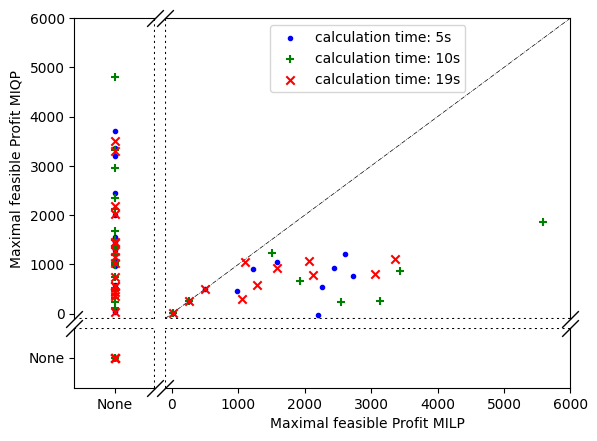

In [7]:
fig, axes = plot_data(results)#, ticks=[0, 1000, 2000, 3000, 4000])
#plt.savefig('figure_MILP_vs_MIQP')

In [8]:
# fig, axes = plot_data(results[10])
# plt.savefig('figure_MILP_vs_MIQP_10s')

In [9]:
calculation_times = np.sort([key for key in results.keys()])
table_data = {
    key: np.array([
        results[calculation_time][key] 
        for calculation_time in calculation_times
    ]).flatten()
    for key in results[calculation_times[0]].keys()
}

table_data = np.array([[*key, *np.round(value).astype(int)] for key, value in table_data.items()])
table_data = list(table_data[np.argsort(100 * table_data[:, 5] + 10 * table_data[:, 0] + table_data[:, 1])])
aux = lambda x: x if x > -1e9 else None
table_data = [[aux(x) for x in line] for line in table_data]

table_string = ''
#table_string += '\\begin{table}[] \n'
table_string += '\\begin{longtable}{' + (len(table_data[0]) - 3) * 'l' + '} \n'
table_string += '$|P|$ & $|V|$ & $|T|$ '
for calculation_time in calculation_times:
    table_string += f'& l {calculation_time}s & q {calculation_time}s '
table_string += '\\\\\n'
for line in table_data:
    # for entry in line[:-1]:
    #     table_string += f'{entry} & '
    # table_string += str(line[-1]) + ' \\\\\n'
    table_string += f'{line[0] + line[1]} & ' # num ports: prod ports + cons ports
    table_string += f'{line[2] + line[3] + line[4]} & ' # num vessels: smal + medium + large
    table_string += f'{line[5]} & '
    table_string += ' & '.join(np.array(line[6:]).astype(str))
    table_string += '\\\\\n'
    
table_string = table_string[:-3] + '\n'
table_string += '\\end{longtable} \n'
#table_string += '\\end{table}'
print(table_string)

\begin{longtable}{lllllllll} 
$|P|$ & $|V|$ & $|T|$ & l 5s & q 5s & l 10s & q 10s & l 19s & q 19s \\
2 & 1 & 10 & 21 & 21 & 21 & 21 & 21 & 21\\
2 & 1 & 15 & 262 & 262 & 262 & 262 & 262 & 262\\
2 & 1 & 20 & 504 & 504 & None & 509 & 506 & 504\\
3 & 2 & 20 & 977 & 457 & None & 457 & None & 556\\
3 & 1 & 20 & 1588 & 1058 & None & 994 & 1098 & 1058\\
4 & 2 & 20 & None & 971 & None & 1326 & None & 1159\\
4 & 2 & 20 & None & 1060 & 1511 & 1237 & None & 1029\\
4 & 1 & 20 & None & 30 & None & 246 & None & 30\\
4 & 2 & 20 & 2202 & -18 & 2549 & 240 & 1058 & 306\\
5 & 2 & 20 & 2264 & 546 & 1936 & 667 & 2131 & 776\\
5 & 2 & 20 & None & 397 & None & 388 & None & 439\\
5 & 2 & 20 & 1217 & 907 & None & 327 & 1280 & 573\\
6 & 3 & 20 & None & 1555 & None & 1183 & None & 1438\\
6 & 2 & 20 & None & 1285 & None & 1682 & 3064 & 813\\
2 & 1 & 25 & None & None & None & 748 & None & 746\\
3 & 2 & 25 & 2445 & 937 & 3441 & 869 & 1584 & 931\\
3 & 2 & 25 & None & 1457 & None & 1496 & None & 1457\\
4 & 2 & 25 & Non